In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import keisemi2 as eco


In [2]:
beta = 0.985**30  # 割引因子
gamma = 2.0  # 相対的危険回避度
rent = 1.025**30-1.0  # 純利子率

# パラメータ
nw = int(10)  # 所得グリッドの数
w_max = 1.0  # 所得グリッドの最大値
w_min = 0.1  # 所得グリッドの最小値

na = int(40)  # 貯蓄グリッドの数
a_max = 1.0  # 貯蓄グリッドの最大値
a_min = 0.025  # 貯蓄グリッドの最小値

# 計算時間をカウント開始
start = time.time()

print("")
print("-+-+-+- Solve two period model using discretization -+-+-+-")



-+-+-+- Solve two period model using discretization -+-+-+-


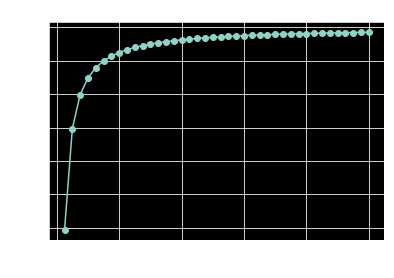

In [3]:
grid_w = np.linspace(w_min, w_max, nw)
grid_a = np.linspace(a_min, a_max, na)

# 2期の効用関数をプロットしてみる(最終的な結果には不要な計算)

util2 = beta*eco.CRRA((1.0+rent)*grid_a, gamma)

# 効用関数の図を描く
plt.figure()
plt.plot(grid_a, util2, marker='o')
plt.title("utility function")
plt.xlabel("asset at period 2")
plt.ylabel("utility at period 2")
plt.grid(True)
plt.savefig('Fig2_utility_at_period2.pdf')
plt.show()


In [4]:

obj = np.empty((na, nw))

for i in range(nw):
    for j in range(na):
        cons = grid_w[i] - grid_a[j]
        if cons > 0.0:
            obj[j, i] = eco.CRRA(cons, gamma) \
                        + beta*eco.CRRA((1.0+rent)*grid_a[j], gamma)
        else:
            # 消費が負値の場合、ペナルティを与えてその値が選ばれないようにする
            obj[j, i] = -1000.0



In [5]:

pol = np.empty(nw)

for i in range(nw):
    maxl = np.ndarray.argmax(obj[:, i])
    pol[i] = grid_a[maxl]

# 計算時間をカウント終了
elapsed_time = time.time() - start

print('-+- computation time -+-')
print(elapsed_time)


-+- computation time -+-
0.47960877418518066


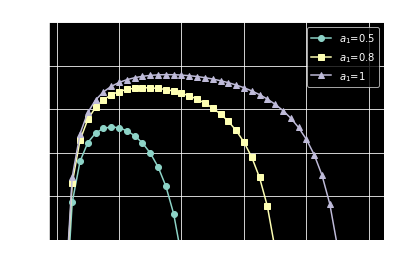

In [6]:

plt.figure()
plt.plot(grid_a, obj[:, 4], marker='o', label='$a_1$=0.5')
plt.plot(grid_a, obj[:, 7], marker='s', label='$a_1$=0.8')
plt.plot(grid_a, obj[:, 9], marker='^', label='$a_1$=1')
plt.title("life time utility")
plt.xlabel("saving")
plt.ylabel("life time utility")
plt.ylim(-10, 0)
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('Fig2_utility_max.pdf')
plt.show()


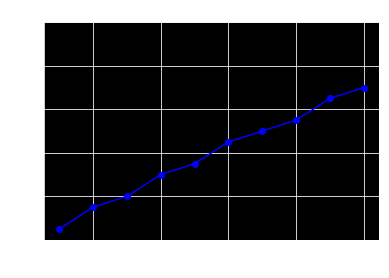

In [7]:
plt.figure()
plt.plot(grid_w, pol, marker='o', color='blue', label='policy')
plt.title("policy function")
plt.xlabel("current asset")
plt.ylabel("next asset")
plt.ylim(0, 0.5)
plt.grid(True)
plt.savefig('Fig2_pol_discr.png')
plt.show()

